<a href="https://colab.research.google.com/github/natnew/100-Days-of-Data-Science/blob/main/Data_Science_For_Beginners_3_Data_Visualization_10_visualization_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Explore the birds dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
birds = pd.read_csv('birds.csv')
birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


In general, you can quickly look at the way data is distributed by using a scatter plot as we did in the previous lesson:

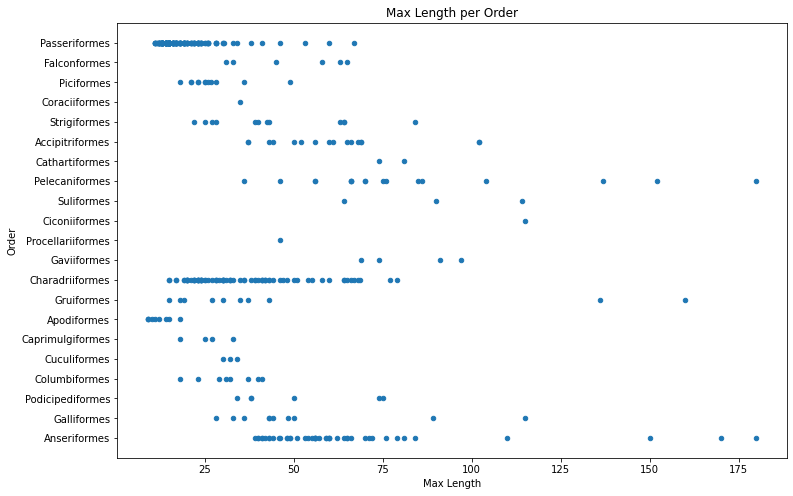

In [ ]:
birds.plot(kind='scatter',x='MaxLength',y='Order',figsize=(12,8))

plt.title('Max Length per Order')
plt.ylabel('Order')
plt.xlabel('Max Length')

plt.show()

This gives an overview of the general distribution of body length per bird Order, but it is not the optimal way to display true distributions. That task is usually handled by creating a Histogram.

##Working with histograms

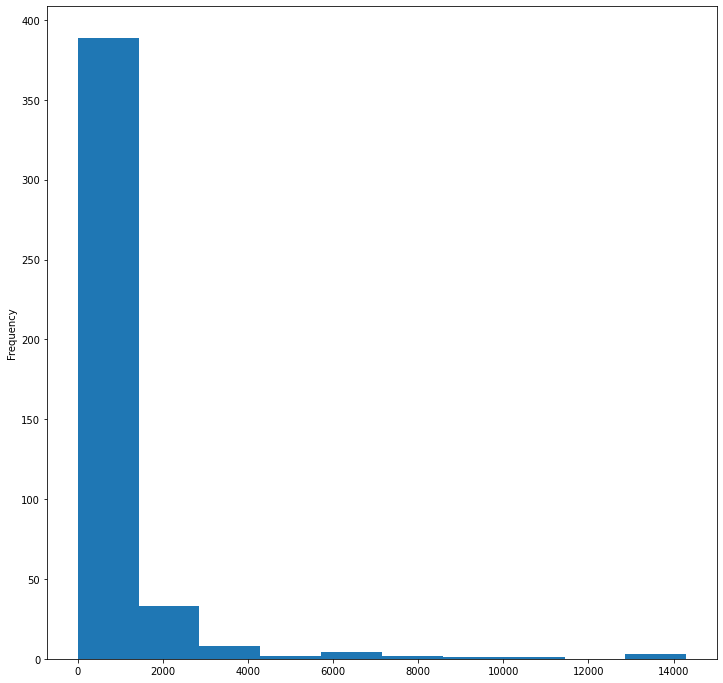

In [ ]:
birds['MaxBodyMass'].plot(kind = 'hist', bins = 10, figsize = (12,12))
plt.show()

As you can see, most of the 400+ birds in this dataset fall in the range of under 2000 for their Max Body Mass. Gain more insight into the data by changing the bins parameter to a higher number, something like 30:

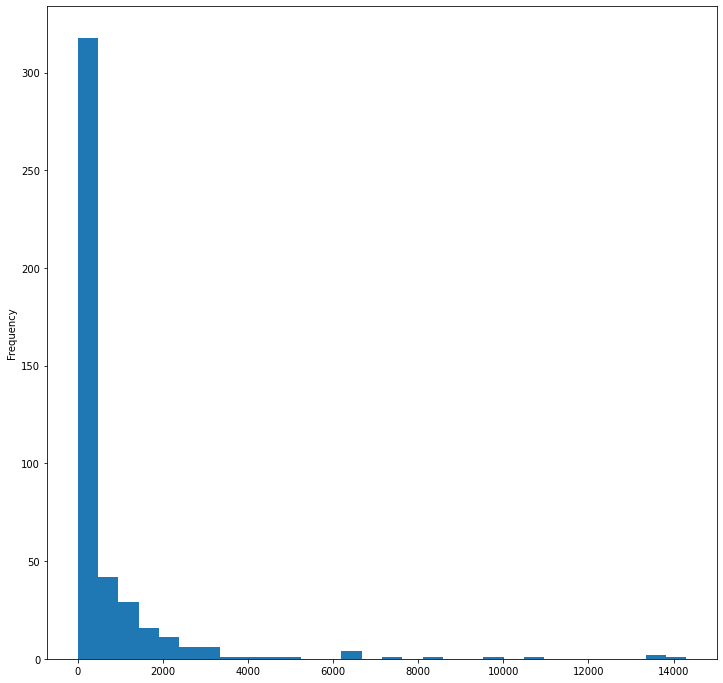

In [ ]:
birds['MaxBodyMass'].plot(kind = 'hist', bins = 30, figsize = (12,12))
plt.show()

This chart shows the distribution in a bit more granular fashion. A chart less skewed to the left could be created by ensuring that you only select data within a given range:

Filter your data to get only those birds whose body mass is under 60, and show 40 bins:

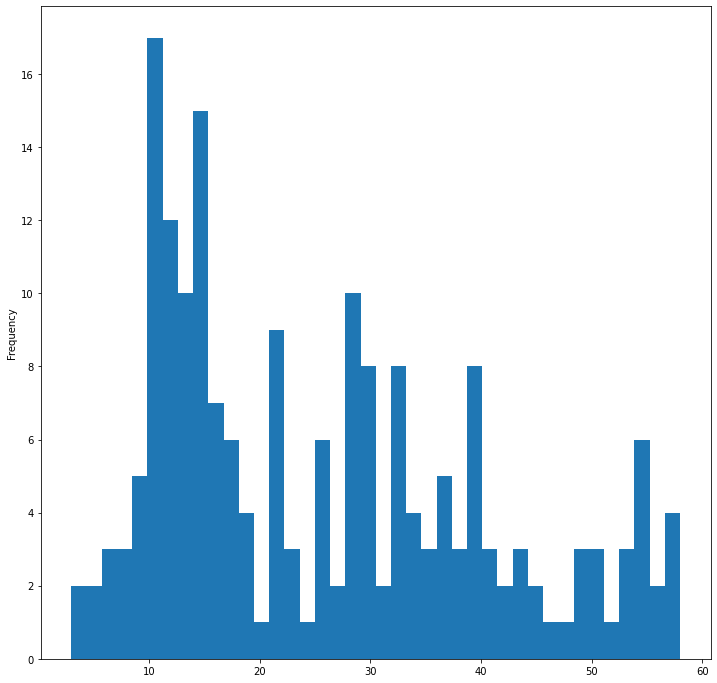

In [ ]:
filteredBirds = birds[(birds['MaxBodyMass'] > 1) & (birds['MaxBodyMass'] < 60)]      
filteredBirds['MaxBodyMass'].plot(kind = 'hist',bins = 40,figsize = (12,12))
plt.show()   

Try some other filters and data points. To see the full distribution of the data, remove the ['MaxBodyMass'] filter to show labeled distributions.

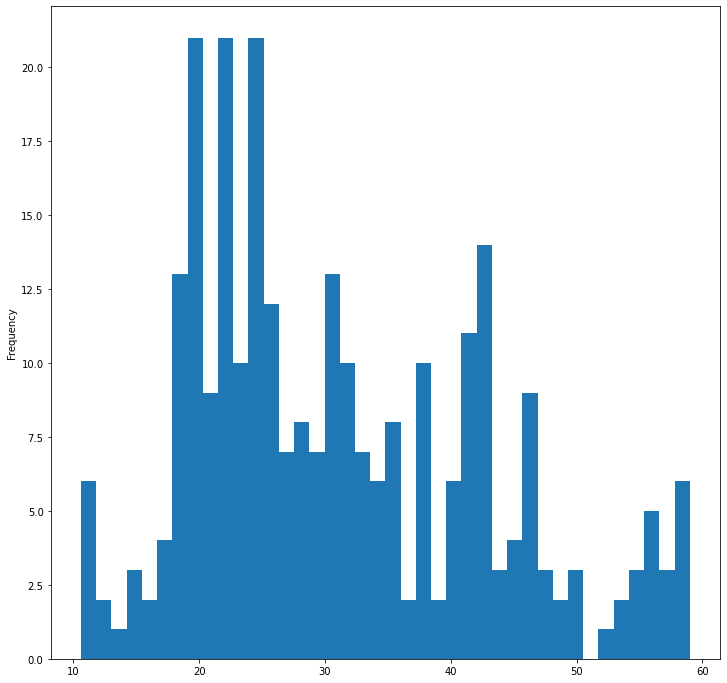

In [ ]:
filteredBirds = birds[(birds['MaxWingspan'] > 1) & (birds['MaxWingspan'] < 60)]      
filteredBirds['MaxWingspan'].plot(kind = 'hist',bins = 40,figsize = (12,12))
plt.show()

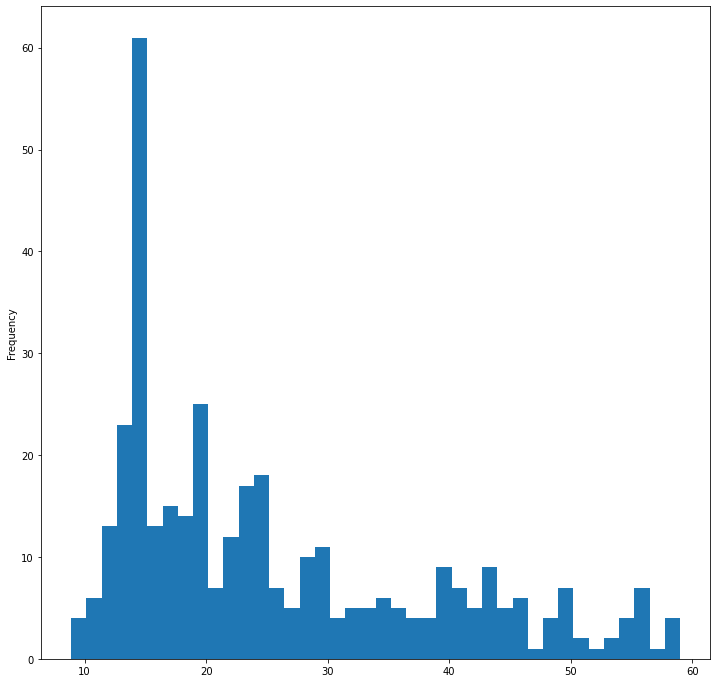

In [ ]:
filteredBirds = birds[(birds['MaxLength'] > 1) & (birds['MaxLength'] < 60)]      
filteredBirds['MaxLength'].plot(kind = 'hist',bins = 40,figsize = (12,12))
plt.show()

The histogram offers some nice color and labeling enhancements to try as well:

Create a 2D histogram to compare the relationship between two distributions. Let's compare MaxBodyMass vs. MaxLength. Matplotlib offers a built-in way to show convergence using brighter colors:

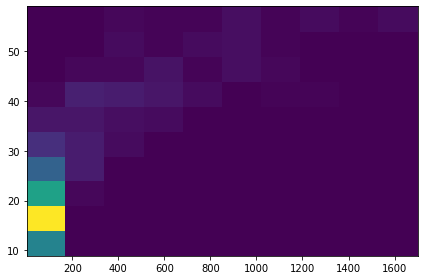

In [ ]:
x = filteredBirds['MaxBodyMass']
y = filteredBirds['MaxLength']

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

Histograms work well by default for numeric data.

This dataset also includes good information about the bird category and its genus, species, and family as well as its conservation status. Let's dig into this conservation information. What is the distribution of the birds according to their conservation status?

These are text-based values so you will need to do a transform to create a histogram. Using the filteredBirds dataframe, display its conservation status alongside its Minimum Wingspan. What do you see?

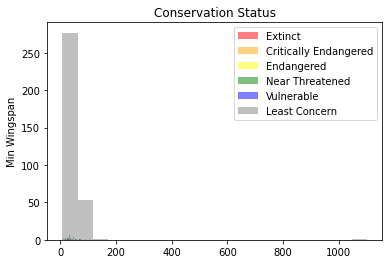

In [ ]:
x1 = filteredBirds.loc[filteredBirds.ConservationStatus=='EX', 'MinWingspan']
x2 = filteredBirds.loc[filteredBirds.ConservationStatus=='CR', 'MinWingspan']
x3 = filteredBirds.loc[filteredBirds.ConservationStatus=='EN', 'MinWingspan']
x4 = filteredBirds.loc[filteredBirds.ConservationStatus=='NT', 'MinWingspan']
x5 = filteredBirds.loc[filteredBirds.ConservationStatus=='VU', 'MinWingspan']
x6 = filteredBirds.loc[filteredBirds.ConservationStatus=='LC', 'MinWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Min Wingspan')
plt.legend();

You may have noticed that the histograms we have looked at so far are 'stepped' and do not flow smoothly in an arc. To show a smoother density chart, you can try a density plot.

To work with density plots, familiarize yourself with a new plotting library, Seaborn.

Loading Seaborn, try a basic density plot:

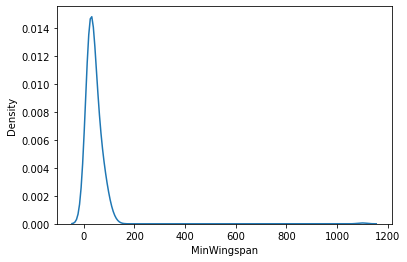

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(filteredBirds['MinWingspan'])
plt.show()

You can see how the plot echoes the previous one for Minimum Wingspan data; it's just a bit smoother.

This type of chart offers beautifully explanatory visualizations. With a few lines of code, for example, you can show the max body mass density per bird Order:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


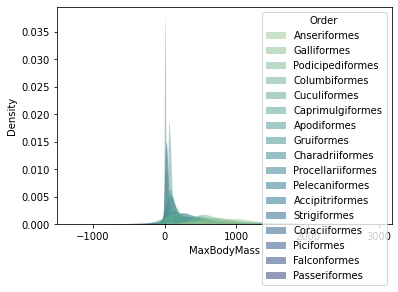

In [ ]:
sns.kdeplot(
   data=filteredBirds, x="MaxBodyMass", hue="Order",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

You can also map the density of several variables in one chart. Text the MaxLength and MinLength of a bird compared to their conservation status:



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


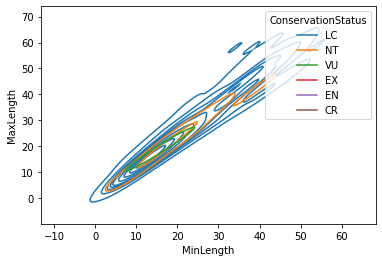

In [ ]:
sns.kdeplot(data=filteredBirds, x="MinLength", y="MaxLength", hue="ConservationStatus")